In [15]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf,step, tf2ss, ss2tf, bode, balred
import scipy
from scipy.signal import residue

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found


# Nominal

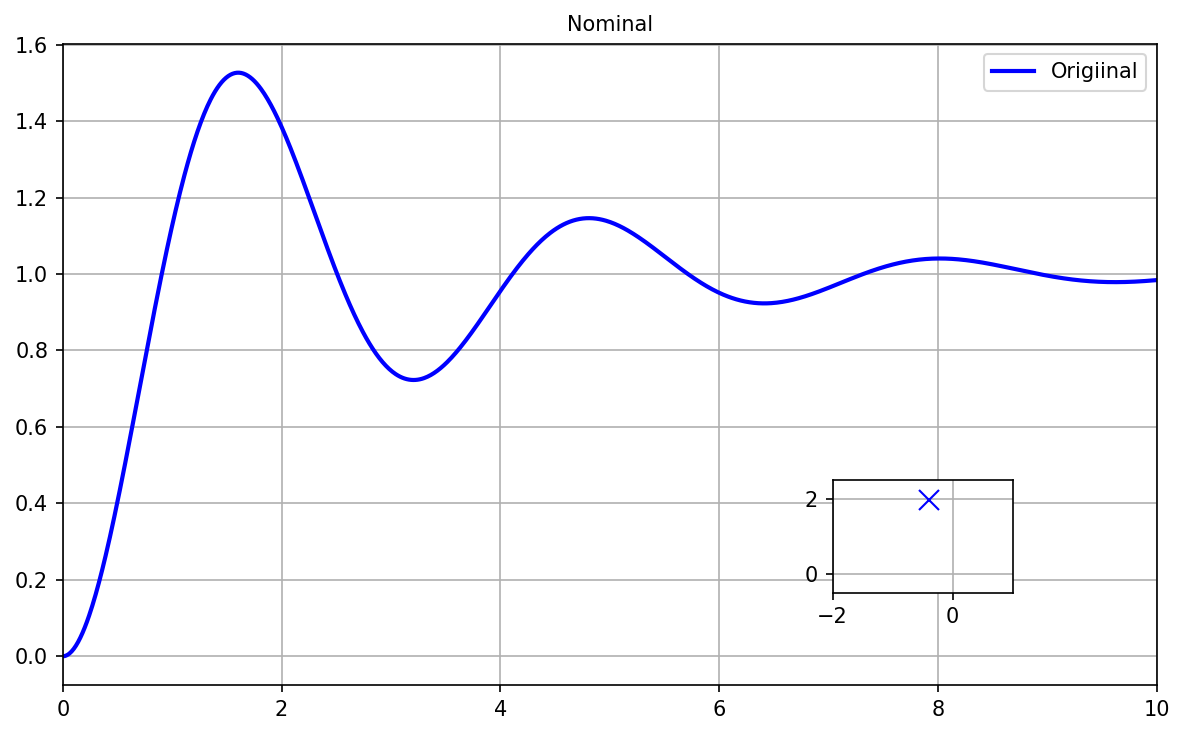

In [16]:
#key parameters
wn = 2
zeta = .2
wd = wn*np.sqrt(1-zeta**2)
sigma = zeta*wn
sigma_p = 1.5*sigma

# system
D = np.convolve((1,sigma),(1,sigma))+(0,0,wd**2)
G0 = tf(wn**2,D)

# response
yap,t = step(G0,np.linspace(0,10,1000))

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,sharex = True)
ax.plot(t,yap,'b-',label=r'Origiinal')
plt.title('Nominal')
plt.legend()

left, bottom, width, height = [0.7, 0.2, 0.15, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.figure.set_facecolor('w')
ax2.plot(np.real(G0.poles()),np.imag(G0.poles()), 'x', ms=10, color='b')
ax2.set_xlim((-2,1))
ax2.set_ylim((-.5,2.5))
plt.show()

# Move Left

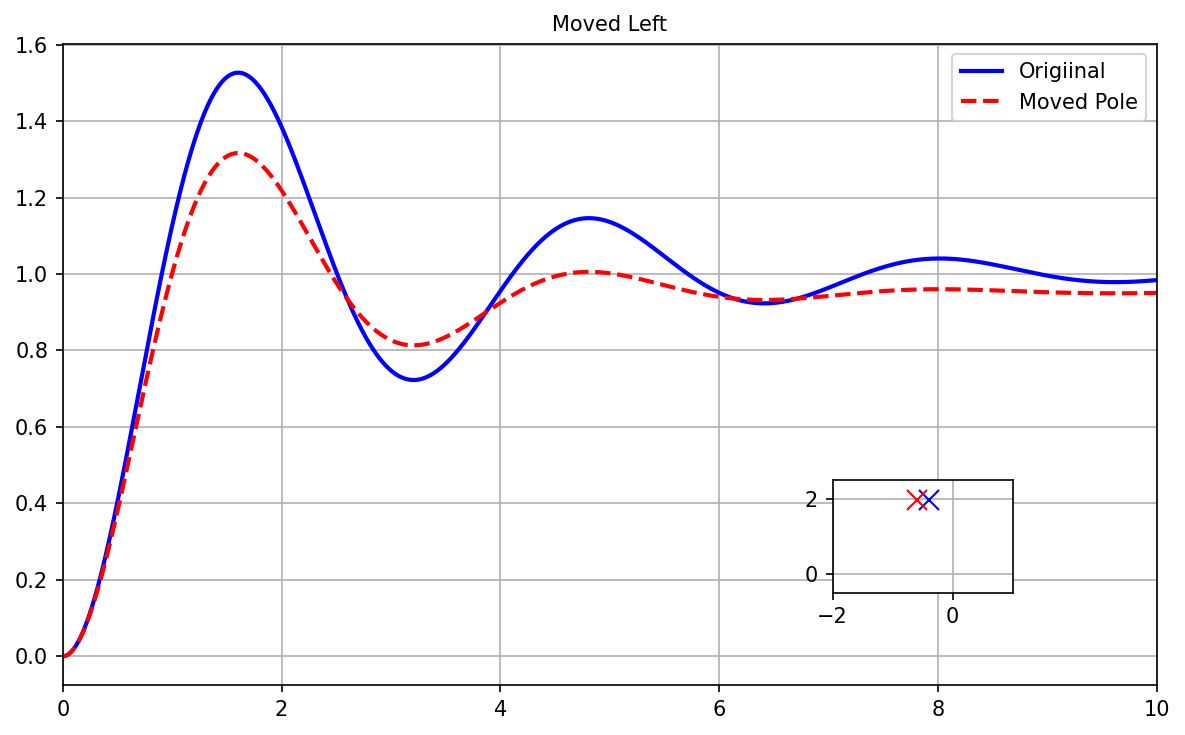

In [17]:
sigma_p = 1.5*sigma

D = np.convolve((1,sigma),(1,sigma))+(0,0,wd**2)
D_p = np.convolve((1,sigma_p),(1,sigma_p))+(0,0,wd**2)

G0 = tf(wn**2,D)
G1 = tf(wn**2,D_p)

yap,t = step(G0,T=t)
y1,t = step(G1,t)

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,sharex = True)

ax.plot(t,yap,'b-',label=r'Origiinal')
ax.plot(t,y1,'r--',label=r'Moved Pole')
plt.title('Moved Left')
plt.legend()

left, bottom, width, height = [0.7, 0.2, 0.15, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.figure.set_facecolor('w')
ax2.plot(np.real(G0.poles()),np.imag(G0.poles()), 'x', ms=10, color='b')
ax2.plot(np.real(G1.poles()),np.imag(G1.poles()), 'rx', ms=10, color='r')
ax2.set_xlim((-2,1))
ax2.set_ylim((-.5,2.5))

plt.show()

# Move up

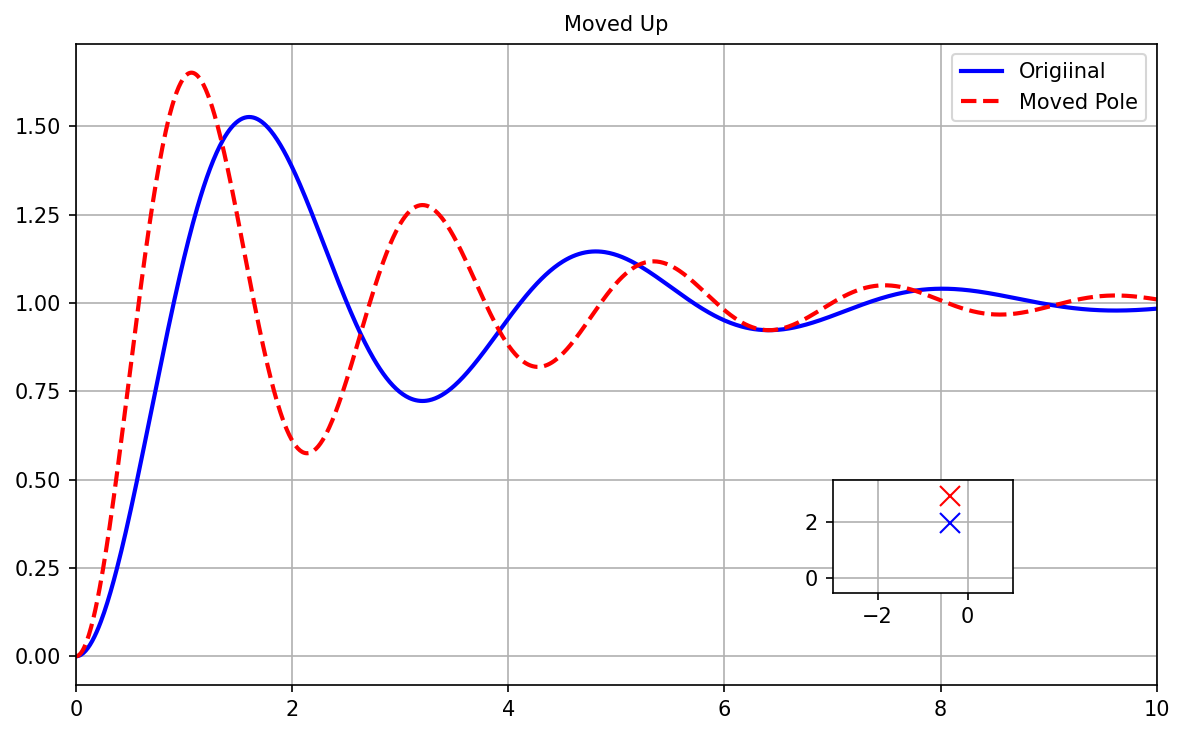

In [18]:
wd_p = 1.5*wd
zeta_p = sigma/np.sqrt(wd_p**2 + (sigma)**2)
wn_p = sigma/zeta_p

s = tf('s')
# add faster with a zero
G0 = wn**2/((s+sigma)**2 + wd**2)
G1 = wn_p**2/((s+sigma)**2 + wd_p**2)

yap,t = step(G0,T=t)
y1,t = step(G1,T=t)

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,sharex = True)
ax.plot(t,yap,'b-',label=r'Origiinal')
ax.plot(t,y1,'r--',label=r'Moved Pole')
plt.title('Moved Up')
plt.legend()

left, bottom, width, height = [0.7, 0.2, 0.15, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.figure.set_facecolor('w')
ax2.plot(np.real(G0.poles()),np.imag(G0.poles()), 'x', ms=10, color='b')
ax2.plot(np.real(G1.poles()),np.imag(G1.poles()), 'rx', ms=10, color='r')
ax2.set_xlim((-3,1))
ax2.set_ylim((-.5,3.5))

plt.show()

# Add Damping


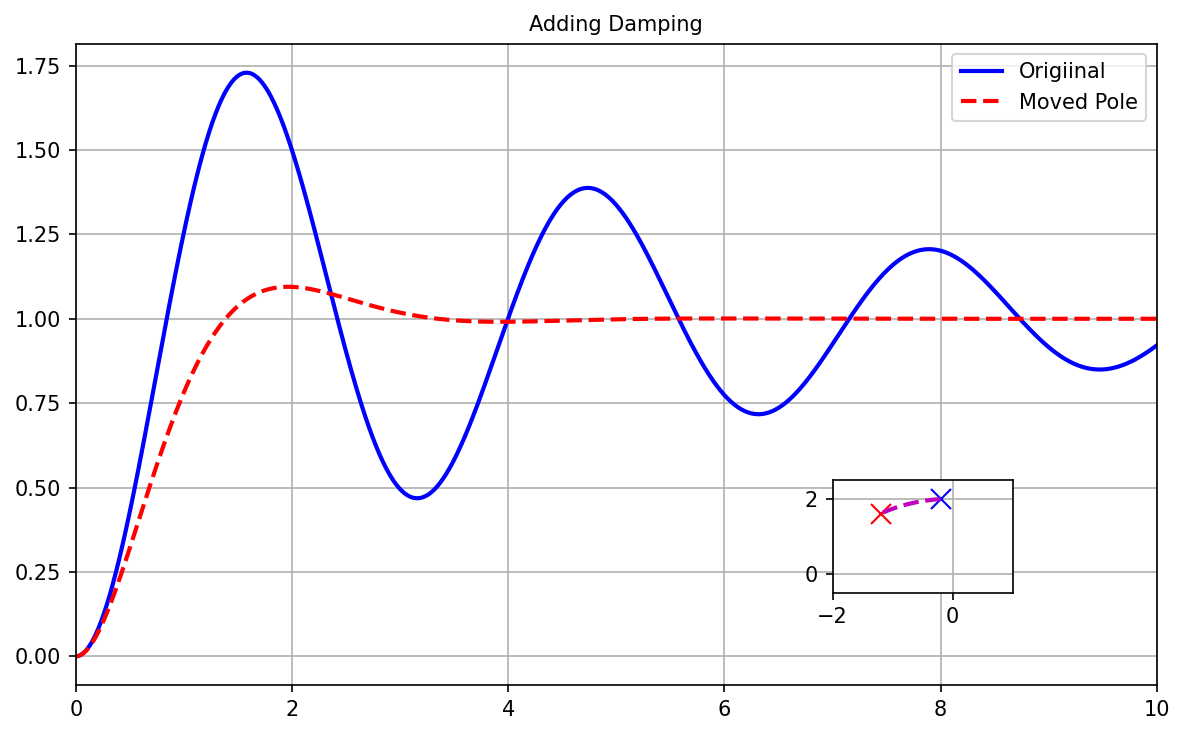

In [19]:
zeta = .1
zeta_p = .6

G0 = tf(wn**2,(1, 2*zeta*wn, wn**2))
G1 = tf(wn**2,(1, 2*zeta_p*wn, wn**2))

yap,t = step(G0,t)
y1,t = step(G1,t)

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,sharex = True)
ax.plot(t,yap,'b-',label=r'Origiinal')
ax.plot(t,y1,'r--',label=r'Moved Pole')
plt.title('Adding Damping')
plt.legend()

left, bottom, width, height = [0.7, 0.2, 0.15, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.figure.set_facecolor('w')
ax2.plot(np.real(G0.poles()),np.imag(G0.poles()), 'x', ms=10, color='b')
ax2.plot(np.real(G1.poles()),np.imag(G1.poles()), 'rx', ms=10, color='r')
ax2.set_xlim((-2,1))
ax2.set_ylim((-0.5,2.5))

theta0 = np.arccos(zeta)
theta1 = np.arccos(zeta_p)
theta = np.linspace(theta0,theta1,100)
ax2.plot(-wn*np.cos(theta),(wn*np.sin(theta)),'m--')

plt.show()

# Move out

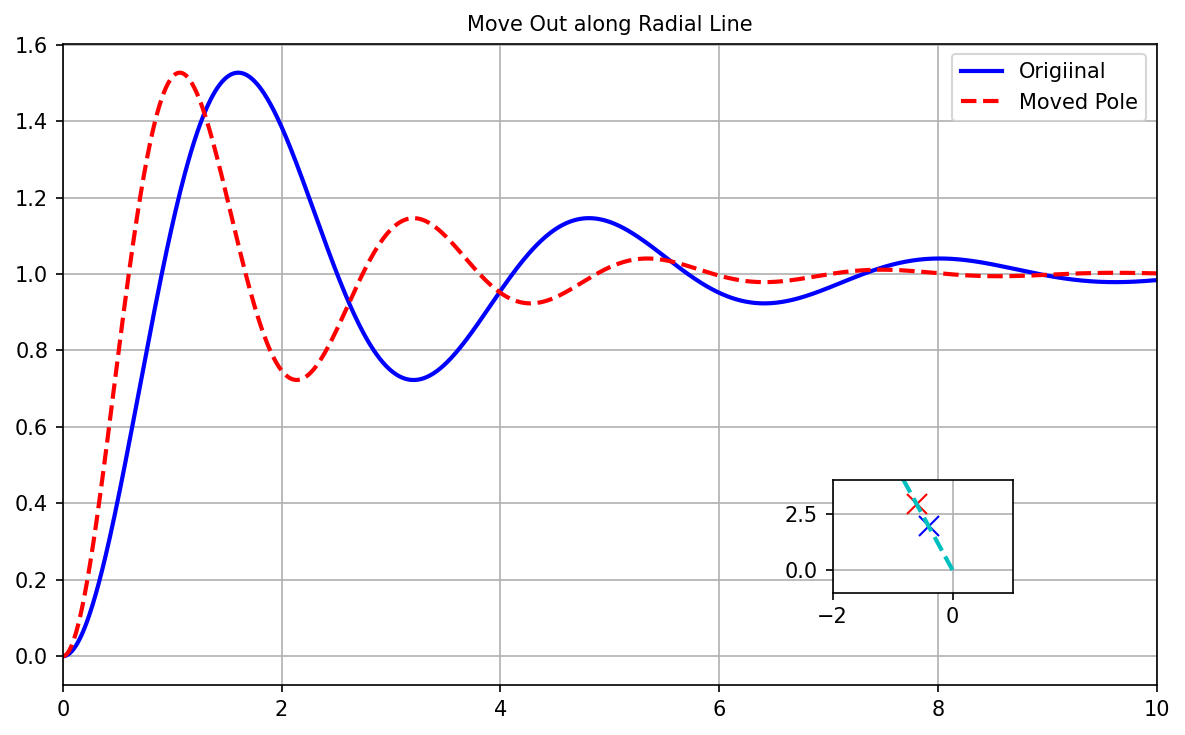

In [20]:
wn_p = wn*1.5
zeta = .2

G0 = tf(wn**2,(1, 2*zeta*wn, wn**2))
G1 = tf(wn_p**2,(1, 2*zeta*wn_p, wn_p**2))

yap,t = step(G0,t)
y1,t = step(G1,t)

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,sharex = True)
ax.plot(t,yap,'b-',label=r'Origiinal')
ax.plot(t,y1,'r--',label=r'Moved Pole')
plt.title('Move Out along Radial Line')
plt.legend()

left, bottom, width, height = [0.7, 0.2, 0.15, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.figure.set_facecolor('w')
ax2.plot(np.real(G0.poles()),np.imag(G0.poles()), 'x', ms=10, color='b')
ax2.plot(np.real(G1.poles()),np.imag(G1.poles()), 'rx', ms=10, color='r')
ax2.set_xlim((-2,1))
ax2.set_ylim((-1,4))

theta = np.arccos(zeta)
ax2.plot([0,-10*np.cos(theta)],[0,10*np.sin(theta)],'c--')

plt.show()